<a href="https://colab.research.google.com/github/darbyatNE/DS5020/blob/main/02_penguins_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02-penguins -- exercises

Goals...

* Use the excellent Python documentation -- the examples, in particular!!
* Loading files into built-in data types
* Convenience functions for data cleaning & processing
* Data viz with matplotlib
* Prototype with colab, version control with command-line git & github

## Beginning with the end in sight

* Ref: [Overview of seaborn plotting functions](https://seaborn.pydata.org/tutorial/function_overview.html)

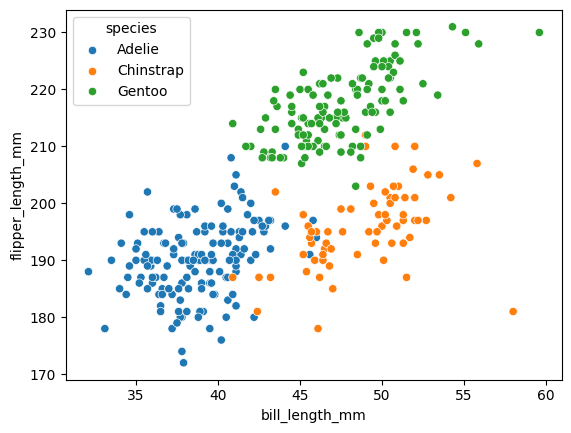

In [3]:
import seaborn as sns

penguins = sns.load_dataset("penguins")
sns.scatterplot(penguins, x="bill_length_mm", y="flipper_length_mm", hue="species");

# Setup

Downloading files with `curl -O` -- this works in Colab, Linux & Mac

* `curl -O` (that's a capital O) will download the file in the the local directory, preserving the filename
* you'll be able to open the file with the standard relative pathname (no microsoft idiosyncracies)
* [3.3 Files and the operating system](https://wesmckinney.com/book/python-builtin.html#files_os) -- McKinney
* Getting a file from github onto the local filesystem
    * Use the "raw" URL
    * This URL is the github GUI: https://github.com/allisonhorst/palmerpenguins/blob/master/inst/extdata/penguins.csv
    * BTW: This version of "peguins.csv" uses "NA" for missing data. We'll have to deal with that later on.
    * There is no "download" option on the github page.
    * To use `curl`, you need to distinguish the URL for the github GUI

In [4]:
# Copy the github file onto the local filesystem -- this is NOT part of the exam.
!curl -O "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15241  100 15241    0     0  51496      0 --:--:-- --:--:-- --:--:-- 51489


In [5]:
# Colab is running on linux
!uname -a

Linux 32d34ebf99c5 6.1.58+ #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


In [6]:
!ls

penguins.csv  sample_data


In [7]:
# The full pathname would be "/content/penguins.csv"
!pwd

/content


# File I/O

**TL;DR:** There's a lot going on under the hood.

* [built-in functions](https://docs.python.org/3/library/functions.html)
* [`open()`](https://docs.python.org/3/library/functions.html#open)
  * `open()`returns a [file object](https://docs.python.org/3/glossary.html#term-file-object)
    * there are 3 types of file objects: raw binary, buffered binary, text
    * "the canonical way to create a file object is by using the `open()` function"
* If you google "file objects python", the 2nd link gets you to docs.python.org
  * As for the first link (it's geekstogeeks.com)? ...no comment.
* [File Objects](https://docs.python.org/3/c-api/file.html) -- docs.python.org
  * C API reference manual (looking under the hood)
  * [C API stability](https://docs.python.org/3/c-api/stable.html#stable) -- docs.python.org
  * [Stable Application Binary Interface](https://docs.python.org/3/c-api/stable.html#stable-application-binary-interface)
    * "All functions in the Stable ABI are present as functions in Python’s shared library, not solely as macros. This makes them usable from languages that don’t use the C preprocessor."
    * "The goal for the Limited API is to allow everything that is possible with the full C API, but possibly with a performance penalty."
  * [Platform considerations](https://docs.python.org/3/c-api/stable.html#platform-considerations)
  * ["Contents of limited API"](https://docs.python.org/3/c-api/stable.html#contents-of-limited-api)
    * note: this is a "limited" API
* [7. Input and Output](https://docs.python.org/3/tutorial/inputoutput.html) -- Python tutorial
  * [7.2 Reading and writing files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)
  * `with` keyword

# Exercise 1 -- read and parse a CSV into a list of dictionaries


* Write a function that reads a generic CSV file from your local filesystem.
  * The function should return a list of dictionary objects.
  * Assume the first row of the CSV file represents the dictionary keys.
  * Each row after the first represents a set of dictionary values, with one dictionary per row.
  * Use that function to read a copy of "penguins.csv" that you get onto your filesystem from [this github repo](https://github.com/allisonhorst/palmerpenguins/tree/master/inst/extdata).
* Use only Python's [built-in functions](https://docs.python.org/3/library/functions.html),
[I/O methods](https://docs.python.org/3/tutorial/inputoutput.html)
and [string methods](https://docs.python.org/3/library/stdtypes.html?highlight=rstrip#string-methods).
* Set up your function to read "penguins.csv" as the default.

### Read a text file from a local filesystem.
*  Python syntax is in this link: [Reading and writing files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)
* Don't use seaborn, which is a powerful black box.
  * Like a horse with blinders, it does some things well but is constrained to do those things and not much else...
  * [seaborn pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
* Don't use Python's [csv module](https://docs.python.org/3/library/csv.html) -- you could, but the point here is to processing a text file
  * You might google for "python" and "CSV" and find a Python [csv module](https://docs.python.org/3/library/csv.html) demo -- don't use it.
  * There's more to life than CSVs
* If you come across something like [this stackoverflow answer](https://stackoverflow.com/questions/8369219/how-to-read-a-text-file-into-a-string-variable-and-strip-newlines) make sure you know what to do
  * For example, it's highly ranked but over a decade old and probably Python 2, not 3
  * Turns out that it works in Python 3

### Read the CSV as a text file from the local filesystem.
*  Look here to get started: [Reading and writing files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)
  * Python syntax for opening and reading a file on the local filesystem is here
  * In particular, look at the `with open...` example at the end of section 7.2, right before 7.2.1
  * In 7.2.1, you'll have to choose between reading the entire file or one line at a time -- either one works
* Don't use seaborn, which is a powerful black box...
  * [seaborn pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
* Don't use Python's [csv module](https://docs.python.org/3/library/csv.html) -- you could, but the point here is to processing a text file
  * You might google for "python" and "CSV" and find a Python [csv module](https://docs.python.org/3/library/csv.html) demo -- don't use it.
  * There's more to life than CSVs
* If you come across something like [this stackoverflow answer](https://stackoverflow.com/questions/8369219/how-to-read-a-text-file-into-a-string-variable-and-strip-newlines) make sure you know what to do
  * For example, it's highly ranked but over a decade old and probably Python 2, not 3
  * Turns out that it works in Python 3

### You can create a function that parses the entire file with `file.read()`

* We'll call this function -- `readit_all()`
* Read the file into memory as one string with `file.read()`
* Split it up with `list = file.read().rstrip().split("\n")`
  * `.rstrip()` - removes spaces from right-hand side of the string
  * without `.rstrip()` the trailing "\n" creates an empty object
  * `.split("\n")` splits the string at every line
* First element in this list contains dictionary keys
* Process each additional element of this list into a dictionary

### Or create a function that parses one line at a time `file.readline()`

* We'll call it `readit_lines()`
* With `file.readline()` you should process one string per line in a for loop
```
for line in file:
    list = line.rstrip().split(",") # .rstrip() is optional
```
* You should probably remove the newline but it's not necessary.
* Populate a dictionary by combining a list of keys and values
  * Ideally, they'll use a dictionary comprehension.
  * It's okay if they use a for loop.
  * If they parse it "by hand" then that should be a warning.
* Populate a list of dictionaries with `.append()`

In [8]:
# Reading the file all at once
def readit_all(filename = "penguins.csv"):
  """
  Read and parse CSV -- read entire file all at once.
  """
  with open(filename, 'r') as file:
    mylist = file.read().rstrip().split("\n") # rstrip() is needed

  keys = mylist.pop(0).split(",")
  data = []
  for line in mylist:
    values = line.split(",")
    datum = {keys[i]: value for i, value in enumerate(values)}
    data.append(datum)

  return data

readit_all()

[{'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '39.1',
  'bill_depth_mm': '18.7',
  'flipper_length_mm': '181',
  'body_mass_g': '3750',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '39.5',
  'bill_depth_mm': '17.4',
  'flipper_length_mm': '186',
  'body_mass_g': '3800',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '40.3',
  'bill_depth_mm': '18',
  'flipper_length_mm': '195',
  'body_mass_g': '3250',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': 'NA',
  'bill_depth_mm': 'NA',
  'flipper_length_mm': 'NA',
  'body_mass_g': 'NA',
  'sex': 'NA',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '36.7',
  'bill_depth_mm': '19.3',
  'flipper_length_mm': '193',
  'body_mass_g': '3450',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 

In [11]:
penguinlist=[{'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '39.1',
  'bill_depth_mm': '18.7',
  'flipper_length_mm': '181',
  'body_mass_g': '3750',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '39.5',
  'bill_depth_mm': '17.4',
  'flipper_length_mm': '186',
  'body_mass_g': '3800',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '40.3',
  'bill_depth_mm': '18',
  'flipper_length_mm': '195',
  'body_mass_g': '3250',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': 'NA',
  'bill_depth_mm': 'NA',
  'flipper_length_mm': 'NA',
  'body_mass_g': 'NA',
  'sex': 'NA',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '36.7',
  'bill_depth_mm': '19.3',
  'flipper_length_mm': '193',
  'body_mass_g': '3450',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '39.3',
  'bill_depth_mm': '20.6',
  'flipper_length_mm': '190',
  'body_mass_g': '3650',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '38.9',
  'bill_depth_mm': '17.8',
  'flipper_length_mm': '181',
  'body_mass_g': '3625',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '39.2',
  'bill_depth_mm': '19.6',
  'flipper_length_mm': '195',
  'body_mass_g': '4675',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '34.1',
  'bill_depth_mm': '18.1',
  'flipper_length_mm': '193',
  'body_mass_g': '3475',
  'sex': 'NA',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '42',
  'bill_depth_mm': '20.2',
  'flipper_length_mm': '190',
  'body_mass_g': '4250',
  'sex': 'NA',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '37.8',
  'bill_depth_mm': '17.1',
  'flipper_length_mm': '186',
  'body_mass_g': '3300',
  'sex': 'NA',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '37.8',
  'bill_depth_mm': '17.3',
  'flipper_length_mm': '180',
  'body_mass_g': '3700',
  'sex': 'NA',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '41.1',
  'bill_depth_mm': '17.6',
  'flipper_length_mm': '182',
  'body_mass_g': '3200',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '38.6',
  'bill_depth_mm': '21.2',
  'flipper_length_mm': '191',
  'body_mass_g': '3800',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '34.6',
  'bill_depth_mm': '21.1',
  'flipper_length_mm': '198',
  'body_mass_g': '4400',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '36.6',
  'bill_depth_mm': '17.8',
  'flipper_length_mm': '185',
  'body_mass_g': '3700',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '38.7',
  'bill_depth_mm': '19',
  'flipper_length_mm': '195',
  'body_mass_g': '3450',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '42.5',
  'bill_depth_mm': '20.7',
  'flipper_length_mm': '197',
  'body_mass_g': '4500',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '34.4',
  'bill_depth_mm': '18.4',
  'flipper_length_mm': '184',
  'body_mass_g': '3325',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '46',
  'bill_depth_mm': '21.5',
  'flipper_length_mm': '194',
  'body_mass_g': '4200',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '37.8',
  'bill_depth_mm': '18.3',
  'flipper_length_mm': '174',
  'body_mass_g': '3400',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '37.7',
  'bill_depth_mm': '18.7',
  'flipper_length_mm': '180',
  'body_mass_g': '3600',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '35.9',
  'bill_depth_mm': '19.2',
  'flipper_length_mm': '189',
  'body_mass_g': '3800',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '38.2',
  'bill_depth_mm': '18.1',
  'flipper_length_mm': '185',
  'body_mass_g': '3950',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '38.8',
  'bill_depth_mm': '17.2',
  'flipper_length_mm': '180',
  'body_mass_g': '3800',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '35.3',
  'bill_depth_mm': '18.9',
  'flipper_length_mm': '187',
  'body_mass_g': '3800',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '40.6',
  'bill_depth_mm': '18.6',
  'flipper_length_mm': '183',
  'body_mass_g': '3550',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '40.5',
  'bill_depth_mm': '17.9',
  'flipper_length_mm': '187',
  'body_mass_g': '3200',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '37.9',
  'bill_depth_mm': '18.6',
  'flipper_length_mm': '172',
  'body_mass_g': '3150',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '40.5',
  'bill_depth_mm': '18.9',
  'flipper_length_mm': '180',
  'body_mass_g': '3950',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '39.5',
  'bill_depth_mm': '16.7',
  'flipper_length_mm': '178',
  'body_mass_g': '3250',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '37.2',
  'bill_depth_mm': '18.1',
  'flipper_length_mm': '178',
  'body_mass_g': '3900',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '39.5',
  'bill_depth_mm': '17.8',
  'flipper_length_mm': '188',
  'body_mass_g': '3300',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '40.9',
  'bill_depth_mm': '18.9',
  'flipper_length_mm': '184',
  'body_mass_g': '3900',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '36.4',
  'bill_depth_mm': '17',
  'flipper_length_mm': '195',
  'body_mass_g': '3325',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '39.2',
  'bill_depth_mm': '21.1',
  'flipper_length_mm': '196',
  'body_mass_g': '4150',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '38.8',
  'bill_depth_mm': '20',
  'flipper_length_mm': '190',
  'body_mass_g': '3950',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '42.2',
  'bill_depth_mm': '18.5',
  'flipper_length_mm': '180',
  'body_mass_g': '3550',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '37.6',
  'bill_depth_mm': '19.3',
  'flipper_length_mm': '181',
  'body_mass_g': '3300',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '39.8',
  'bill_depth_mm': '19.1',
  'flipper_length_mm': '184',
  'body_mass_g': '4650',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '36.5',
  'bill_depth_mm': '18',
  'flipper_length_mm': '182',
  'body_mass_g': '3150',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '40.8',
  'bill_depth_mm': '18.4',
  'flipper_length_mm': '195',
  'body_mass_g': '3900',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '36',
  'bill_depth_mm': '18.5',
  'flipper_length_mm': '186',
  'body_mass_g': '3100',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '44.1',
  'bill_depth_mm': '19.7',
  'flipper_length_mm': '196',
  'body_mass_g': '4400',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '37',
  'bill_depth_mm': '16.9',
  'flipper_length_mm': '185',
  'body_mass_g': '3000',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '39.6',
  'bill_depth_mm': '18.8',
  'flipper_length_mm': '190',
  'body_mass_g': '4600',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '41.1',
  'bill_depth_mm': '19',
  'flipper_length_mm': '182',
  'body_mass_g': '3425',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '37.5',
  'bill_depth_mm': '18.9',
  'flipper_length_mm': '179',
  'body_mass_g': '2975',
  'sex': 'NA',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '36',
  'bill_depth_mm': '17.9',
  'flipper_length_mm': '190',
  'body_mass_g': '3450',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '42.3',
  'bill_depth_mm': '21.2',
  'flipper_length_mm': '191',
  'body_mass_g': '4150',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '39.6',
  'bill_depth_mm': '17.7',
  'flipper_length_mm': '186',
  'body_mass_g': '3500',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '40.1',
  'bill_depth_mm': '18.9',
  'flipper_length_mm': '188',
  'body_mass_g': '4300',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '35',
  'bill_depth_mm': '17.9',
  'flipper_length_mm': '190',
  'body_mass_g': '3450',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '42',
  'bill_depth_mm': '19.5',
  'flipper_length_mm': '200',
  'body_mass_g': '4050',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '34.5',
  'bill_depth_mm': '18.1',
  'flipper_length_mm': '187',
  'body_mass_g': '2900',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '41.4',
  'bill_depth_mm': '18.6',
  'flipper_length_mm': '191',
  'body_mass_g': '3700',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '39',
  'bill_depth_mm': '17.5',
  'flipper_length_mm': '186',
  'body_mass_g': '3550',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '40.6',
  'bill_depth_mm': '18.8',
  'flipper_length_mm': '193',
  'body_mass_g': '3800',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '36.5',
  'bill_depth_mm': '16.6',
  'flipper_length_mm': '181',
  'body_mass_g': '2850',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '37.6',
  'bill_depth_mm': '19.1',
  'flipper_length_mm': '194',
  'body_mass_g': '3750',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '35.7',
  'bill_depth_mm': '16.9',
  'flipper_length_mm': '185',
  'body_mass_g': '3150',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '41.3',
  'bill_depth_mm': '21.1',
  'flipper_length_mm': '195',
  'body_mass_g': '4400',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '37.6',
  'bill_depth_mm': '17',
  'flipper_length_mm': '185',
  'body_mass_g': '3600',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '41.1',
  'bill_depth_mm': '18.2',
  'flipper_length_mm': '192',
  'body_mass_g': '4050',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '36.4',
  'bill_depth_mm': '17.1',
  'flipper_length_mm': '184',
  'body_mass_g': '2850',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '41.6',
  'bill_depth_mm': '18',
  'flipper_length_mm': '192',
  'body_mass_g': '3950',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '35.5',
  'bill_depth_mm': '16.2',
  'flipper_length_mm': '195',
  'body_mass_g': '3350',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '41.1',
  'bill_depth_mm': '19.1',
  'flipper_length_mm': '188',
  'body_mass_g': '4100',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '35.9',
  'bill_depth_mm': '16.6',
  'flipper_length_mm': '190',
  'body_mass_g': '3050',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '41.8',
  'bill_depth_mm': '19.4',
  'flipper_length_mm': '198',
  'body_mass_g': '4450',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '33.5',
  'bill_depth_mm': '19',
  'flipper_length_mm': '190',
  'body_mass_g': '3600',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '39.7',
  'bill_depth_mm': '18.4',
  'flipper_length_mm': '190',
  'body_mass_g': '3900',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '39.6',
  'bill_depth_mm': '17.2',
  'flipper_length_mm': '196',
  'body_mass_g': '3550',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '45.8',
  'bill_depth_mm': '18.9',
  'flipper_length_mm': '197',
  'body_mass_g': '4150',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '35.5',
  'bill_depth_mm': '17.5',
  'flipper_length_mm': '190',
  'body_mass_g': '3700',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '42.8',
  'bill_depth_mm': '18.5',
  'flipper_length_mm': '195',
  'body_mass_g': '4250',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '40.9',
  'bill_depth_mm': '16.8',
  'flipper_length_mm': '191',
  'body_mass_g': '3700',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '37.2',
  'bill_depth_mm': '19.4',
  'flipper_length_mm': '184',
  'body_mass_g': '3900',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '36.2',
  'bill_depth_mm': '16.1',
  'flipper_length_mm': '187',
  'body_mass_g': '3550',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '42.1',
  'bill_depth_mm': '19.1',
  'flipper_length_mm': '195',
  'body_mass_g': '4000',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '34.6',
  'bill_depth_mm': '17.2',
  'flipper_length_mm': '189',
  'body_mass_g': '3200',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '42.9',
  'bill_depth_mm': '17.6',
  'flipper_length_mm': '196',
  'body_mass_g': '4700',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '36.7',
  'bill_depth_mm': '18.8',
  'flipper_length_mm': '187',
  'body_mass_g': '3800',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '35.1',
  'bill_depth_mm': '19.4',
  'flipper_length_mm': '193',
  'body_mass_g': '4200',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '37.3',
  'bill_depth_mm': '17.8',
  'flipper_length_mm': '191',
  'body_mass_g': '3350',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '41.3',
  'bill_depth_mm': '20.3',
  'flipper_length_mm': '194',
  'body_mass_g': '3550',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '36.3',
  'bill_depth_mm': '19.5',
  'flipper_length_mm': '190',
  'body_mass_g': '3800',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '36.9',
  'bill_depth_mm': '18.6',
  'flipper_length_mm': '189',
  'body_mass_g': '3500',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '38.3',
  'bill_depth_mm': '19.2',
  'flipper_length_mm': '189',
  'body_mass_g': '3950',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '38.9',
  'bill_depth_mm': '18.8',
  'flipper_length_mm': '190',
  'body_mass_g': '3600',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '35.7',
  'bill_depth_mm': '18',
  'flipper_length_mm': '202',
  'body_mass_g': '3550',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '41.1',
  'bill_depth_mm': '18.1',
  'flipper_length_mm': '205',
  'body_mass_g': '4300',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '34',
  'bill_depth_mm': '17.1',
  'flipper_length_mm': '185',
  'body_mass_g': '3400',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '39.6',
  'bill_depth_mm': '18.1',
  'flipper_length_mm': '186',
  'body_mass_g': '4450',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '36.2',
  'bill_depth_mm': '17.3',
  'flipper_length_mm': '187',
  'body_mass_g': '3300',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '40.8',
  'bill_depth_mm': '18.9',
  'flipper_length_mm': '208',
  'body_mass_g': '4300',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '38.1',
  'bill_depth_mm': '18.6',
  'flipper_length_mm': '190',
  'body_mass_g': '3700',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '40.3',
  'bill_depth_mm': '18.5',
  'flipper_length_mm': '196',
  'body_mass_g': '4350',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '33.1',
  'bill_depth_mm': '16.1',
  'flipper_length_mm': '178',
  'body_mass_g': '2900',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '43.2',
  'bill_depth_mm': '18.5',
  'flipper_length_mm': '192',
  'body_mass_g': '4100',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '35',
  'bill_depth_mm': '17.9',
  'flipper_length_mm': '192',
  'body_mass_g': '3725',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '41',
  'bill_depth_mm': '20',
  'flipper_length_mm': '203',
  'body_mass_g': '4725',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '37.7',
  'bill_depth_mm': '16',
  'flipper_length_mm': '183',
  'body_mass_g': '3075',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '37.8',
  'bill_depth_mm': '20',
  'flipper_length_mm': '190',
  'body_mass_g': '4250',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '37.9',
  'bill_depth_mm': '18.6',
  'flipper_length_mm': '193',
  'body_mass_g': '2925',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '39.7',
  'bill_depth_mm': '18.9',
  'flipper_length_mm': '184',
  'body_mass_g': '3550',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '38.6',
  'bill_depth_mm': '17.2',
  'flipper_length_mm': '199',
  'body_mass_g': '3750',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '38.2',
  'bill_depth_mm': '20',
  'flipper_length_mm': '190',
  'body_mass_g': '3900',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '38.1',
  'bill_depth_mm': '17',
  'flipper_length_mm': '181',
  'body_mass_g': '3175',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '43.2',
  'bill_depth_mm': '19',
  'flipper_length_mm': '197',
  'body_mass_g': '4775',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '38.1',
  'bill_depth_mm': '16.5',
  'flipper_length_mm': '198',
  'body_mass_g': '3825',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '45.6',
  'bill_depth_mm': '20.3',
  'flipper_length_mm': '191',
  'body_mass_g': '4600',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '39.7',
  'bill_depth_mm': '17.7',
  'flipper_length_mm': '193',
  'body_mass_g': '3200',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '42.2',
  'bill_depth_mm': '19.5',
  'flipper_length_mm': '197',
  'body_mass_g': '4275',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '39.6',
  'bill_depth_mm': '20.7',
  'flipper_length_mm': '191',
  'body_mass_g': '3900',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Biscoe',
  'bill_length_mm': '42.7',
  'bill_depth_mm': '18.3',
  'flipper_length_mm': '196',
  'body_mass_g': '4075',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '38.6',
  'bill_depth_mm': '17',
  'flipper_length_mm': '188',
  'body_mass_g': '2900',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '37.3',
  'bill_depth_mm': '20.5',
  'flipper_length_mm': '199',
  'body_mass_g': '3775',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '35.7',
  'bill_depth_mm': '17',
  'flipper_length_mm': '189',
  'body_mass_g': '3350',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '41.1',
  'bill_depth_mm': '18.6',
  'flipper_length_mm': '189',
  'body_mass_g': '3325',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '36.2',
  'bill_depth_mm': '17.2',
  'flipper_length_mm': '187',
  'body_mass_g': '3150',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '37.7',
  'bill_depth_mm': '19.8',
  'flipper_length_mm': '198',
  'body_mass_g': '3500',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '40.2',
  'bill_depth_mm': '17',
  'flipper_length_mm': '176',
  'body_mass_g': '3450',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '41.4',
  'bill_depth_mm': '18.5',
  'flipper_length_mm': '202',
  'body_mass_g': '3875',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '35.2',
  'bill_depth_mm': '15.9',
  'flipper_length_mm': '186',
  'body_mass_g': '3050',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '40.6',
  'bill_depth_mm': '19',
  'flipper_length_mm': '199',
  'body_mass_g': '4000',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '38.8',
  'bill_depth_mm': '17.6',
  'flipper_length_mm': '191',
  'body_mass_g': '3275',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '41.5',
  'bill_depth_mm': '18.3',
  'flipper_length_mm': '195',
  'body_mass_g': '4300',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '39',
  'bill_depth_mm': '17.1',
  'flipper_length_mm': '191',
  'body_mass_g': '3050',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '44.1',
  'bill_depth_mm': '18',
  'flipper_length_mm': '210',
  'body_mass_g': '4000',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '38.5',
  'bill_depth_mm': '17.9',
  'flipper_length_mm': '190',
  'body_mass_g': '3325',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': '43.1',
  'bill_depth_mm': '19.2',
  'flipper_length_mm': '197',
  'body_mass_g': '3500',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '36.8',
  'bill_depth_mm': '18.5',
  'flipper_length_mm': '193',
  'body_mass_g': '3500',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '37.5',
  'bill_depth_mm': '18.5',
  'flipper_length_mm': '199',
  'body_mass_g': '4475',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '38.1',
  'bill_depth_mm': '17.6',
  'flipper_length_mm': '187',
  'body_mass_g': '3425',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '41.1',
  'bill_depth_mm': '17.5',
  'flipper_length_mm': '190',
  'body_mass_g': '3900',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '35.6',
  'bill_depth_mm': '17.5',
  'flipper_length_mm': '191',
  'body_mass_g': '3175',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '40.2',
  'bill_depth_mm': '20.1',
  'flipper_length_mm': '200',
  'body_mass_g': '3975',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '37',
  'bill_depth_mm': '16.5',
  'flipper_length_mm': '185',
  'body_mass_g': '3400',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '39.7',
  'bill_depth_mm': '17.9',
  'flipper_length_mm': '193',
  'body_mass_g': '4250',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '40.2',
  'bill_depth_mm': '17.1',
  'flipper_length_mm': '193',
  'body_mass_g': '3400',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '40.6',
  'bill_depth_mm': '17.2',
  'flipper_length_mm': '187',
  'body_mass_g': '3475',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '32.1',
  'bill_depth_mm': '15.5',
  'flipper_length_mm': '188',
  'body_mass_g': '3050',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '40.7',
  'bill_depth_mm': '17',
  'flipper_length_mm': '190',
  'body_mass_g': '3725',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '37.3',
  'bill_depth_mm': '16.8',
  'flipper_length_mm': '192',
  'body_mass_g': '3000',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '39',
  'bill_depth_mm': '18.7',
  'flipper_length_mm': '185',
  'body_mass_g': '3650',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '39.2',
  'bill_depth_mm': '18.6',
  'flipper_length_mm': '190',
  'body_mass_g': '4250',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '36.6',
  'bill_depth_mm': '18.4',
  'flipper_length_mm': '184',
  'body_mass_g': '3475',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '36',
  'bill_depth_mm': '17.8',
  'flipper_length_mm': '195',
  'body_mass_g': '3450',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '37.8',
  'bill_depth_mm': '18.1',
  'flipper_length_mm': '193',
  'body_mass_g': '3750',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '36',
  'bill_depth_mm': '17.1',
  'flipper_length_mm': '187',
  'body_mass_g': '3700',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Adelie',
  'island': 'Dream',
  'bill_length_mm': '41.5',
  'bill_depth_mm': '18.5',
  'flipper_length_mm': '201',
  'body_mass_g': '4000',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.1',
  'bill_depth_mm': '13.2',
  'flipper_length_mm': '211',
  'body_mass_g': '4500',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '50',
  'bill_depth_mm': '16.3',
  'flipper_length_mm': '230',
  'body_mass_g': '5700',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '48.7',
  'bill_depth_mm': '14.1',
  'flipper_length_mm': '210',
  'body_mass_g': '4450',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '50',
  'bill_depth_mm': '15.2',
  'flipper_length_mm': '218',
  'body_mass_g': '5700',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '47.6',
  'bill_depth_mm': '14.5',
  'flipper_length_mm': '215',
  'body_mass_g': '5400',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.5',
  'bill_depth_mm': '13.5',
  'flipper_length_mm': '210',
  'body_mass_g': '4550',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.4',
  'bill_depth_mm': '14.6',
  'flipper_length_mm': '211',
  'body_mass_g': '4800',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.7',
  'bill_depth_mm': '15.3',
  'flipper_length_mm': '219',
  'body_mass_g': '5200',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '43.3',
  'bill_depth_mm': '13.4',
  'flipper_length_mm': '209',
  'body_mass_g': '4400',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.8',
  'bill_depth_mm': '15.4',
  'flipper_length_mm': '215',
  'body_mass_g': '5150',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '40.9',
  'bill_depth_mm': '13.7',
  'flipper_length_mm': '214',
  'body_mass_g': '4650',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '49',
  'bill_depth_mm': '16.1',
  'flipper_length_mm': '216',
  'body_mass_g': '5550',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.5',
  'bill_depth_mm': '13.7',
  'flipper_length_mm': '214',
  'body_mass_g': '4650',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '48.4',
  'bill_depth_mm': '14.6',
  'flipper_length_mm': '213',
  'body_mass_g': '5850',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.8',
  'bill_depth_mm': '14.6',
  'flipper_length_mm': '210',
  'body_mass_g': '4200',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '49.3',
  'bill_depth_mm': '15.7',
  'flipper_length_mm': '217',
  'body_mass_g': '5850',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '42',
  'bill_depth_mm': '13.5',
  'flipper_length_mm': '210',
  'body_mass_g': '4150',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '49.2',
  'bill_depth_mm': '15.2',
  'flipper_length_mm': '221',
  'body_mass_g': '6300',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.2',
  'bill_depth_mm': '14.5',
  'flipper_length_mm': '209',
  'body_mass_g': '4800',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '48.7',
  'bill_depth_mm': '15.1',
  'flipper_length_mm': '222',
  'body_mass_g': '5350',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '50.2',
  'bill_depth_mm': '14.3',
  'flipper_length_mm': '218',
  'body_mass_g': '5700',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.1',
  'bill_depth_mm': '14.5',
  'flipper_length_mm': '215',
  'body_mass_g': '5000',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.5',
  'bill_depth_mm': '14.5',
  'flipper_length_mm': '213',
  'body_mass_g': '4400',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.3',
  'bill_depth_mm': '15.8',
  'flipper_length_mm': '215',
  'body_mass_g': '5050',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '42.9',
  'bill_depth_mm': '13.1',
  'flipper_length_mm': '215',
  'body_mass_g': '5000',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.1',
  'bill_depth_mm': '15.1',
  'flipper_length_mm': '215',
  'body_mass_g': '5100',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '44.5',
  'bill_depth_mm': '14.3',
  'flipper_length_mm': '216',
  'body_mass_g': '4100',
  'sex': 'NA',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '47.8',
  'bill_depth_mm': '15',
  'flipper_length_mm': '215',
  'body_mass_g': '5650',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '48.2',
  'bill_depth_mm': '14.3',
  'flipper_length_mm': '210',
  'body_mass_g': '4600',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '50',
  'bill_depth_mm': '15.3',
  'flipper_length_mm': '220',
  'body_mass_g': '5550',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '47.3',
  'bill_depth_mm': '15.3',
  'flipper_length_mm': '222',
  'body_mass_g': '5250',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '42.8',
  'bill_depth_mm': '14.2',
  'flipper_length_mm': '209',
  'body_mass_g': '4700',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.1',
  'bill_depth_mm': '14.5',
  'flipper_length_mm': '207',
  'body_mass_g': '5050',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '59.6',
  'bill_depth_mm': '17',
  'flipper_length_mm': '230',
  'body_mass_g': '6050',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '49.1',
  'bill_depth_mm': '14.8',
  'flipper_length_mm': '220',
  'body_mass_g': '5150',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '48.4',
  'bill_depth_mm': '16.3',
  'flipper_length_mm': '220',
  'body_mass_g': '5400',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '42.6',
  'bill_depth_mm': '13.7',
  'flipper_length_mm': '213',
  'body_mass_g': '4950',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '44.4',
  'bill_depth_mm': '17.3',
  'flipper_length_mm': '219',
  'body_mass_g': '5250',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '44',
  'bill_depth_mm': '13.6',
  'flipper_length_mm': '208',
  'body_mass_g': '4350',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '48.7',
  'bill_depth_mm': '15.7',
  'flipper_length_mm': '208',
  'body_mass_g': '5350',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '42.7',
  'bill_depth_mm': '13.7',
  'flipper_length_mm': '208',
  'body_mass_g': '3950',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '49.6',
  'bill_depth_mm': '16',
  'flipper_length_mm': '225',
  'body_mass_g': '5700',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.3',
  'bill_depth_mm': '13.7',
  'flipper_length_mm': '210',
  'body_mass_g': '4300',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '49.6',
  'bill_depth_mm': '15',
  'flipper_length_mm': '216',
  'body_mass_g': '4750',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '50.5',
  'bill_depth_mm': '15.9',
  'flipper_length_mm': '222',
  'body_mass_g': '5550',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '43.6',
  'bill_depth_mm': '13.9',
  'flipper_length_mm': '217',
  'body_mass_g': '4900',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.5',
  'bill_depth_mm': '13.9',
  'flipper_length_mm': '210',
  'body_mass_g': '4200',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '50.5',
  'bill_depth_mm': '15.9',
  'flipper_length_mm': '225',
  'body_mass_g': '5400',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '44.9',
  'bill_depth_mm': '13.3',
  'flipper_length_mm': '213',
  'body_mass_g': '5100',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.2',
  'bill_depth_mm': '15.8',
  'flipper_length_mm': '215',
  'body_mass_g': '5300',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.6',
  'bill_depth_mm': '14.2',
  'flipper_length_mm': '210',
  'body_mass_g': '4850',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '48.5',
  'bill_depth_mm': '14.1',
  'flipper_length_mm': '220',
  'body_mass_g': '5300',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.1',
  'bill_depth_mm': '14.4',
  'flipper_length_mm': '210',
  'body_mass_g': '4400',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '50.1',
  'bill_depth_mm': '15',
  'flipper_length_mm': '225',
  'body_mass_g': '5000',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.5',
  'bill_depth_mm': '14.4',
  'flipper_length_mm': '217',
  'body_mass_g': '4900',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45',
  'bill_depth_mm': '15.4',
  'flipper_length_mm': '220',
  'body_mass_g': '5050',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '43.8',
  'bill_depth_mm': '13.9',
  'flipper_length_mm': '208',
  'body_mass_g': '4300',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.5',
  'bill_depth_mm': '15',
  'flipper_length_mm': '220',
  'body_mass_g': '5000',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '43.2',
  'bill_depth_mm': '14.5',
  'flipper_length_mm': '208',
  'body_mass_g': '4450',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '50.4',
  'bill_depth_mm': '15.3',
  'flipper_length_mm': '224',
  'body_mass_g': '5550',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.3',
  'bill_depth_mm': '13.8',
  'flipper_length_mm': '208',
  'body_mass_g': '4200',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.2',
  'bill_depth_mm': '14.9',
  'flipper_length_mm': '221',
  'body_mass_g': '5300',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.7',
  'bill_depth_mm': '13.9',
  'flipper_length_mm': '214',
  'body_mass_g': '4400',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '54.3',
  'bill_depth_mm': '15.7',
  'flipper_length_mm': '231',
  'body_mass_g': '5650',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.8',
  'bill_depth_mm': '14.2',
  'flipper_length_mm': '219',
  'body_mass_g': '4700',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '49.8',
  'bill_depth_mm': '16.8',
  'flipper_length_mm': '230',
  'body_mass_g': '5700',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.2',
  'bill_depth_mm': '14.4',
  'flipper_length_mm': '214',
  'body_mass_g': '4650',
  'sex': 'NA',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '49.5',
  'bill_depth_mm': '16.2',
  'flipper_length_mm': '229',
  'body_mass_g': '5800',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '43.5',
  'bill_depth_mm': '14.2',
  'flipper_length_mm': '220',
  'body_mass_g': '4700',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '50.7',
  'bill_depth_mm': '15',
  'flipper_length_mm': '223',
  'body_mass_g': '5550',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '47.7',
  'bill_depth_mm': '15',
  'flipper_length_mm': '216',
  'body_mass_g': '4750',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.4',
  'bill_depth_mm': '15.6',
  'flipper_length_mm': '221',
  'body_mass_g': '5000',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '48.2',
  'bill_depth_mm': '15.6',
  'flipper_length_mm': '221',
  'body_mass_g': '5100',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.5',
  'bill_depth_mm': '14.8',
  'flipper_length_mm': '217',
  'body_mass_g': '5200',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.4',
  'bill_depth_mm': '15',
  'flipper_length_mm': '216',
  'body_mass_g': '4700',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '48.6',
  'bill_depth_mm': '16',
  'flipper_length_mm': '230',
  'body_mass_g': '5800',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '47.5',
  'bill_depth_mm': '14.2',
  'flipper_length_mm': '209',
  'body_mass_g': '4600',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '51.1',
  'bill_depth_mm': '16.3',
  'flipper_length_mm': '220',
  'body_mass_g': '6000',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.2',
  'bill_depth_mm': '13.8',
  'flipper_length_mm': '215',
  'body_mass_g': '4750',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.2',
  'bill_depth_mm': '16.4',
  'flipper_length_mm': '223',
  'body_mass_g': '5950',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '49.1',
  'bill_depth_mm': '14.5',
  'flipper_length_mm': '212',
  'body_mass_g': '4625',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '52.5',
  'bill_depth_mm': '15.6',
  'flipper_length_mm': '221',
  'body_mass_g': '5450',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '47.4',
  'bill_depth_mm': '14.6',
  'flipper_length_mm': '212',
  'body_mass_g': '4725',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '50',
  'bill_depth_mm': '15.9',
  'flipper_length_mm': '224',
  'body_mass_g': '5350',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '44.9',
  'bill_depth_mm': '13.8',
  'flipper_length_mm': '212',
  'body_mass_g': '4750',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '50.8',
  'bill_depth_mm': '17.3',
  'flipper_length_mm': '228',
  'body_mass_g': '5600',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '43.4',
  'bill_depth_mm': '14.4',
  'flipper_length_mm': '218',
  'body_mass_g': '4600',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '51.3',
  'bill_depth_mm': '14.2',
  'flipper_length_mm': '218',
  'body_mass_g': '5300',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '47.5',
  'bill_depth_mm': '14',
  'flipper_length_mm': '212',
  'body_mass_g': '4875',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '52.1',
  'bill_depth_mm': '17',
  'flipper_length_mm': '230',
  'body_mass_g': '5550',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '47.5',
  'bill_depth_mm': '15',
  'flipper_length_mm': '218',
  'body_mass_g': '4950',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '52.2',
  'bill_depth_mm': '17.1',
  'flipper_length_mm': '228',
  'body_mass_g': '5400',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.5',
  'bill_depth_mm': '14.5',
  'flipper_length_mm': '212',
  'body_mass_g': '4750',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '49.5',
  'bill_depth_mm': '16.1',
  'flipper_length_mm': '224',
  'body_mass_g': '5650',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '44.5',
  'bill_depth_mm': '14.7',
  'flipper_length_mm': '214',
  'body_mass_g': '4850',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '50.8',
  'bill_depth_mm': '15.7',
  'flipper_length_mm': '226',
  'body_mass_g': '5200',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '49.4',
  'bill_depth_mm': '15.8',
  'flipper_length_mm': '216',
  'body_mass_g': '4925',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.9',
  'bill_depth_mm': '14.6',
  'flipper_length_mm': '222',
  'body_mass_g': '4875',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '48.4',
  'bill_depth_mm': '14.4',
  'flipper_length_mm': '203',
  'body_mass_g': '4625',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '51.1',
  'bill_depth_mm': '16.5',
  'flipper_length_mm': '225',
  'body_mass_g': '5250',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '48.5',
  'bill_depth_mm': '15',
  'flipper_length_mm': '219',
  'body_mass_g': '4850',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '55.9',
  'bill_depth_mm': '17',
  'flipper_length_mm': '228',
  'body_mass_g': '5600',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '47.2',
  'bill_depth_mm': '15.5',
  'flipper_length_mm': '215',
  'body_mass_g': '4975',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '49.1',
  'bill_depth_mm': '15',
  'flipper_length_mm': '228',
  'body_mass_g': '5500',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '47.3',
  'bill_depth_mm': '13.8',
  'flipper_length_mm': '216',
  'body_mass_g': '4725',
  'sex': 'NA',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.8',
  'bill_depth_mm': '16.1',
  'flipper_length_mm': '215',
  'body_mass_g': '5500',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '41.7',
  'bill_depth_mm': '14.7',
  'flipper_length_mm': '210',
  'body_mass_g': '4700',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '53.4',
  'bill_depth_mm': '15.8',
  'flipper_length_mm': '219',
  'body_mass_g': '5500',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '43.3',
  'bill_depth_mm': '14',
  'flipper_length_mm': '208',
  'body_mass_g': '4575',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '48.1',
  'bill_depth_mm': '15.1',
  'flipper_length_mm': '209',
  'body_mass_g': '5500',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '50.5',
  'bill_depth_mm': '15.2',
  'flipper_length_mm': '216',
  'body_mass_g': '5000',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '49.8',
  'bill_depth_mm': '15.9',
  'flipper_length_mm': '229',
  'body_mass_g': '5950',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '43.5',
  'bill_depth_mm': '15.2',
  'flipper_length_mm': '213',
  'body_mass_g': '4650',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '51.5',
  'bill_depth_mm': '16.3',
  'flipper_length_mm': '230',
  'body_mass_g': '5500',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.2',
  'bill_depth_mm': '14.1',
  'flipper_length_mm': '217',
  'body_mass_g': '4375',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '55.1',
  'bill_depth_mm': '16',
  'flipper_length_mm': '230',
  'body_mass_g': '5850',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '44.5',
  'bill_depth_mm': '15.7',
  'flipper_length_mm': '217',
  'body_mass_g': '4875',
  'sex': 'NA',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '48.8',
  'bill_depth_mm': '16.2',
  'flipper_length_mm': '222',
  'body_mass_g': '6000',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '47.2',
  'bill_depth_mm': '13.7',
  'flipper_length_mm': '214',
  'body_mass_g': '4925',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': 'NA',
  'bill_depth_mm': 'NA',
  'flipper_length_mm': 'NA',
  'body_mass_g': 'NA',
  'sex': 'NA',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '46.8',
  'bill_depth_mm': '14.3',
  'flipper_length_mm': '215',
  'body_mass_g': '4850',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '50.4',
  'bill_depth_mm': '15.7',
  'flipper_length_mm': '222',
  'body_mass_g': '5750',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '45.2',
  'bill_depth_mm': '14.8',
  'flipper_length_mm': '212',
  'body_mass_g': '5200',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Gentoo',
  'island': 'Biscoe',
  'bill_length_mm': '49.9',
  'bill_depth_mm': '16.1',
  'flipper_length_mm': '213',
  'body_mass_g': '5400',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '46.5',
  'bill_depth_mm': '17.9',
  'flipper_length_mm': '192',
  'body_mass_g': '3500',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '50',
  'bill_depth_mm': '19.5',
  'flipper_length_mm': '196',
  'body_mass_g': '3900',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '51.3',
  'bill_depth_mm': '19.2',
  'flipper_length_mm': '193',
  'body_mass_g': '3650',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '45.4',
  'bill_depth_mm': '18.7',
  'flipper_length_mm': '188',
  'body_mass_g': '3525',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '52.7',
  'bill_depth_mm': '19.8',
  'flipper_length_mm': '197',
  'body_mass_g': '3725',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '45.2',
  'bill_depth_mm': '17.8',
  'flipper_length_mm': '198',
  'body_mass_g': '3950',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '46.1',
  'bill_depth_mm': '18.2',
  'flipper_length_mm': '178',
  'body_mass_g': '3250',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '51.3',
  'bill_depth_mm': '18.2',
  'flipper_length_mm': '197',
  'body_mass_g': '3750',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '46',
  'bill_depth_mm': '18.9',
  'flipper_length_mm': '195',
  'body_mass_g': '4150',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '51.3',
  'bill_depth_mm': '19.9',
  'flipper_length_mm': '198',
  'body_mass_g': '3700',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '46.6',
  'bill_depth_mm': '17.8',
  'flipper_length_mm': '193',
  'body_mass_g': '3800',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '51.7',
  'bill_depth_mm': '20.3',
  'flipper_length_mm': '194',
  'body_mass_g': '3775',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '47',
  'bill_depth_mm': '17.3',
  'flipper_length_mm': '185',
  'body_mass_g': '3700',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '52',
  'bill_depth_mm': '18.1',
  'flipper_length_mm': '201',
  'body_mass_g': '4050',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '45.9',
  'bill_depth_mm': '17.1',
  'flipper_length_mm': '190',
  'body_mass_g': '3575',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '50.5',
  'bill_depth_mm': '19.6',
  'flipper_length_mm': '201',
  'body_mass_g': '4050',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '50.3',
  'bill_depth_mm': '20',
  'flipper_length_mm': '197',
  'body_mass_g': '3300',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '58',
  'bill_depth_mm': '17.8',
  'flipper_length_mm': '181',
  'body_mass_g': '3700',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '46.4',
  'bill_depth_mm': '18.6',
  'flipper_length_mm': '190',
  'body_mass_g': '3450',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '49.2',
  'bill_depth_mm': '18.2',
  'flipper_length_mm': '195',
  'body_mass_g': '4400',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '42.4',
  'bill_depth_mm': '17.3',
  'flipper_length_mm': '181',
  'body_mass_g': '3600',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '48.5',
  'bill_depth_mm': '17.5',
  'flipper_length_mm': '191',
  'body_mass_g': '3400',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '43.2',
  'bill_depth_mm': '16.6',
  'flipper_length_mm': '187',
  'body_mass_g': '2900',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '50.6',
  'bill_depth_mm': '19.4',
  'flipper_length_mm': '193',
  'body_mass_g': '3800',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '46.7',
  'bill_depth_mm': '17.9',
  'flipper_length_mm': '195',
  'body_mass_g': '3300',
  'sex': 'female',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '52',
  'bill_depth_mm': '19',
  'flipper_length_mm': '197',
  'body_mass_g': '4150',
  'sex': 'male',
  'year': '2007'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '50.5',
  'bill_depth_mm': '18.4',
  'flipper_length_mm': '200',
  'body_mass_g': '3400',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '49.5',
  'bill_depth_mm': '19',
  'flipper_length_mm': '200',
  'body_mass_g': '3800',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '46.4',
  'bill_depth_mm': '17.8',
  'flipper_length_mm': '191',
  'body_mass_g': '3700',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '52.8',
  'bill_depth_mm': '20',
  'flipper_length_mm': '205',
  'body_mass_g': '4550',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '40.9',
  'bill_depth_mm': '16.6',
  'flipper_length_mm': '187',
  'body_mass_g': '3200',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '54.2',
  'bill_depth_mm': '20.8',
  'flipper_length_mm': '201',
  'body_mass_g': '4300',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '42.5',
  'bill_depth_mm': '16.7',
  'flipper_length_mm': '187',
  'body_mass_g': '3350',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '51',
  'bill_depth_mm': '18.8',
  'flipper_length_mm': '203',
  'body_mass_g': '4100',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '49.7',
  'bill_depth_mm': '18.6',
  'flipper_length_mm': '195',
  'body_mass_g': '3600',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '47.5',
  'bill_depth_mm': '16.8',
  'flipper_length_mm': '199',
  'body_mass_g': '3900',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '47.6',
  'bill_depth_mm': '18.3',
  'flipper_length_mm': '195',
  'body_mass_g': '3850',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '52',
  'bill_depth_mm': '20.7',
  'flipper_length_mm': '210',
  'body_mass_g': '4800',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '46.9',
  'bill_depth_mm': '16.6',
  'flipper_length_mm': '192',
  'body_mass_g': '2700',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '53.5',
  'bill_depth_mm': '19.9',
  'flipper_length_mm': '205',
  'body_mass_g': '4500',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '49',
  'bill_depth_mm': '19.5',
  'flipper_length_mm': '210',
  'body_mass_g': '3950',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '46.2',
  'bill_depth_mm': '17.5',
  'flipper_length_mm': '187',
  'body_mass_g': '3650',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '50.9',
  'bill_depth_mm': '19.1',
  'flipper_length_mm': '196',
  'body_mass_g': '3550',
  'sex': 'male',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '45.5',
  'bill_depth_mm': '17',
  'flipper_length_mm': '196',
  'body_mass_g': '3500',
  'sex': 'female',
  'year': '2008'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '50.9',
  'bill_depth_mm': '17.9',
  'flipper_length_mm': '196',
  'body_mass_g': '3675',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '50.8',
  'bill_depth_mm': '18.5',
  'flipper_length_mm': '201',
  'body_mass_g': '4450',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '50.1',
  'bill_depth_mm': '17.9',
  'flipper_length_mm': '190',
  'body_mass_g': '3400',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '49',
  'bill_depth_mm': '19.6',
  'flipper_length_mm': '212',
  'body_mass_g': '4300',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '51.5',
  'bill_depth_mm': '18.7',
  'flipper_length_mm': '187',
  'body_mass_g': '3250',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '49.8',
  'bill_depth_mm': '17.3',
  'flipper_length_mm': '198',
  'body_mass_g': '3675',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '48.1',
  'bill_depth_mm': '16.4',
  'flipper_length_mm': '199',
  'body_mass_g': '3325',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '51.4',
  'bill_depth_mm': '19',
  'flipper_length_mm': '201',
  'body_mass_g': '3950',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '45.7',
  'bill_depth_mm': '17.3',
  'flipper_length_mm': '193',
  'body_mass_g': '3600',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '50.7',
  'bill_depth_mm': '19.7',
  'flipper_length_mm': '203',
  'body_mass_g': '4050',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '42.5',
  'bill_depth_mm': '17.3',
  'flipper_length_mm': '187',
  'body_mass_g': '3350',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '52.2',
  'bill_depth_mm': '18.8',
  'flipper_length_mm': '197',
  'body_mass_g': '3450',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '45.2',
  'bill_depth_mm': '16.6',
  'flipper_length_mm': '191',
  'body_mass_g': '3250',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '49.3',
  'bill_depth_mm': '19.9',
  'flipper_length_mm': '203',
  'body_mass_g': '4050',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '50.2',
  'bill_depth_mm': '18.8',
  'flipper_length_mm': '202',
  'body_mass_g': '3800',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '45.6',
  'bill_depth_mm': '19.4',
  'flipper_length_mm': '194',
  'body_mass_g': '3525',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '51.9',
  'bill_depth_mm': '19.5',
  'flipper_length_mm': '206',
  'body_mass_g': '3950',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '46.8',
  'bill_depth_mm': '16.5',
  'flipper_length_mm': '189',
  'body_mass_g': '3650',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '45.7',
  'bill_depth_mm': '17',
  'flipper_length_mm': '195',
  'body_mass_g': '3650',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '55.8',
  'bill_depth_mm': '19.8',
  'flipper_length_mm': '207',
  'body_mass_g': '4000',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '43.5',
  'bill_depth_mm': '18.1',
  'flipper_length_mm': '202',
  'body_mass_g': '3400',
  'sex': 'female',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '49.6',
  'bill_depth_mm': '18.2',
  'flipper_length_mm': '193',
  'body_mass_g': '3775',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '50.8',
  'bill_depth_mm': '19',
  'flipper_length_mm': '210',
  'body_mass_g': '4100',
  'sex': 'male',
  'year': '2009'},
 {'species': 'Chinstrap',
  'island': 'Dream',
  'bill_length_mm': '50.2',
  'bill_depth_mm': '18.7',
  'flipper_length_mm': '198',
  'body_mass_g': '3775',
  'sex': 'female',
  'year': '2009'}]

In [12]:
print (penguinlist[4])

{'species': 'Adelie', 'island': 'Torgersen', 'bill_length_mm': '36.7', 'bill_depth_mm': '19.3', 'flipper_length_mm': '193', 'body_mass_g': '3450', 'sex': 'female', 'year': '2007'}


In [37]:
list_of_bills = []
list_of_bills = [float(item['bill_length_mm']) for item in penguinlist if item['bill_length_mm'] != 'NA']

In [39]:
list_of_flippers = []
list_of_flippers = [float(item['flipper_length_mm']) for item in penguinlist if item['flipper_length_mm'] != 'NA']

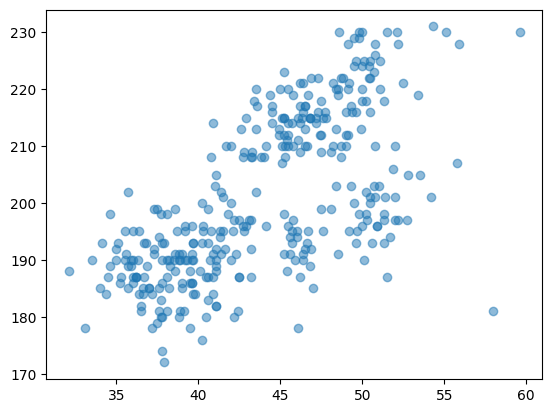

In [40]:
for color in ('red', 'blue', 'brown')
  plt.scatter(list_of_bills, list_of_flippers, c=list_of_colors, alpha=0.5)
  plt.show()

In [30]:
print(list_of_flippers[3])

['flipper_length_mm']


In [9]:
import matplotlib.pyplot as plt
import numpy as np

NameError: name 'data' is not defined

In [ ]:
# Reading the file line by line
def readit_lines(filename = "penguins.csv"):
  """
  Read and parse CSV -- read and process file one line at a time.
  """
  with open(filename, 'r') as file:
    keys = file.readline().rstrip().split(",") # .rstrip() is optional

    data = []
    for line in file:
      list = line.rstrip().split(",") # .rstrip() is optional
      datum = {keys[i]: value for i, value in enumerate(list)}
      data.append(datum)

  return data

readit_lines()

# Exercise #2 -- Plot the list of dictionaries with matplotlib

Overview...

* Use the data returned from the function you wrote in Question #1
* Use matplotlib (only) to visualize bill length vs bill depth with a scatterplot
  * start simple -- just plot the data
* Eventually, we'll want to...
  * use color to distinguish species.
  * add axis labels
  * add a color legend
  * put the processing in a reusable function and add documentation
* A good place to start: [matplotlib.pyplot.scatter()](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html) demo